In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, lars_path
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#read saved DF with info about bags from saved csv
df_all = pd.read_csv('bags_page_info.csv')

In [3]:
df_all.columns

Index(['Title', 'Brand', 'Price', 'Condition', 'Retail_Price', 'Volume',
       'Exterior_Color', 'Exterior_Material', 'Interior_Color',
       'Interior_Material', 'Accessories', 'Ac_Count'],
      dtype='object')

In [4]:
df_all.set_index('Title', inplace=True)

In [5]:
df_all

,Brand,Price,Condition,Retail_Price,Volume,Exterior_Color,Exterior_Material,Interior_Color,Interior_Material,Accessories,Ac_Count
Title,,,,,,,,,,,
Chanel Coco Top Handle Bag Quilted Caviar Medium,Chanel,4060.0,Very Good,4300.0,540.000,Neutral,Leather,Neutral,Fabric,"['Dust bag', 'Detachable Strap']",2.0
Louis Vuitton Pochette Accessoires Damier Mini,Louis Vuitton,490.0,Good,NaN,24.000,Brown,Canvas Coated,Red,Fabric,['No accessories'],0.0
Fendi Baguette NM Bag Zucca Lycra Medium,Fendi,2885.0,Excellent,NaN,170.625,Pink,Fabric,Pink,Fabric,"['Extra Strap', 'Dust bag', 'Detachable Strap']",3.0
Christian Dior Saddle Handbag Oblique Canvas Mini,Christian Dior,3390.0,Excellent,NaN,96.000,Blue,Canvas (Plain),Neutral,Fabric,['No accessories'],0.0
Hermes Kelly Handbag Natural Sable Clemence with Gold Hardware 32,Hermes,7180.0,Good,NaN,562.500,Yellow,Leather,Yellow,Leather,"['Clochette', 'Keys', 'Lock', 'Detachable Strap']",4.0
...,...,...,...,...,...,...,...,...,...,...,...
Louis Vuitton Keepall Bandouliere Bag Macassar Monogram Canvas 45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Louis Vuitton Alma Handbag Monogram Vernis PM,Louis Vuitton,1560.0,Very Good,2390.0,845.000,Red,Patent Leather,Red,Fabric,"['Clochette', 'Keys', 'Lock']",3.0
Chloe Marcie Satchel Leather Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1392 entries, Chanel Coco Top Handle Bag Quilted Caviar Medium to Bottega Veneta The Pouch Leather Large
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1008 non-null   object 
 1   Price              1008 non-null   float64
 2   Condition          1007 non-null   object 
 3   Retail_Price       551 non-null    float64
 4   Volume             1008 non-null   float64
 5   Exterior_Color     1008 non-null   object 
 6   Exterior_Material  1008 non-null   object 
 7   Interior_Color     1005 non-null   object 
 8   Interior_Material  1007 non-null   object 
 9   Accessories        1008 non-null   object 
 10  Ac_Count           1008 non-null   float64
dtypes: float64(4), object(7)
memory usage: 130.5+ KB


In [7]:
#copy of main df without columns "accessories" and "retail price"
df= df_all.loc[:,['Brand', 'Price', 'Condition', 'Volume',
       'Exterior_Color', 'Exterior_Material', 'Interior_Color',
       'Interior_Material', 'Ac_Count']]

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, Chanel Coco Top Handle Bag Quilted Caviar Medium to Gucci Front Zip Camera Bag Guccissima Leather Small
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1003 non-null   object 
 1   Price              1003 non-null   float64
 2   Condition          1003 non-null   object 
 3   Volume             1003 non-null   float64
 4   Exterior_Color     1003 non-null   object 
 5   Exterior_Material  1003 non-null   object 
 6   Interior_Color     1003 non-null   object 
 7   Interior_Material  1003 non-null   object 
 8   Ac_Count           1003 non-null   float64
dtypes: float64(3), object(6)
memory usage: 78.4+ KB


### Creating heatmap and paiplot for numerical features

In [10]:
df.corr()

,Price,Volume,Ac_Count
Price,1.000000,0.074836,0.334919
Volume,0.074836,1.000000,0.113373
Ac_Count,0.334919,0.113373,1.000000


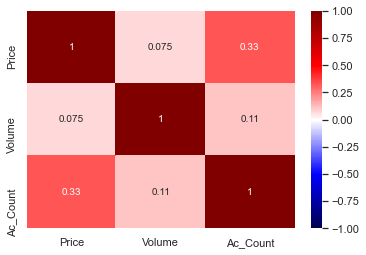

In [11]:
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

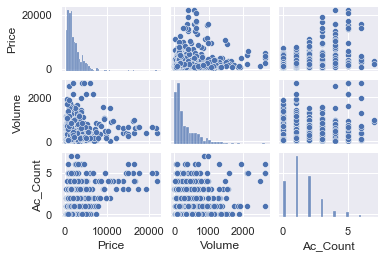

In [12]:
sns.pairplot(df, height=1.2, aspect=1.5);

### Simple Linear Regression for target price and feature: number of accessories

Text(0.5, 1.0, 'Price vs Quanity of accesories')

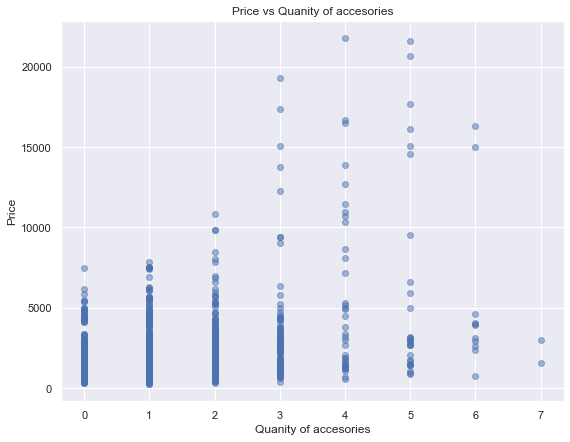

In [13]:
fig, ax = plt.subplots(figsize=(9, 7))

SWISU_x = df[['Ac_Count']]
SWISU_y = df['Price']

ax.scatter(SWISU_x, SWISU_y, alpha=.5)
ax.set_xlabel('Quanity of accesories')
ax.set_ylabel('Price')
ax.set_title('Price vs Quanity of accesories')


In [14]:
lr = LinearRegression()

lr.fit(SWISU_x, SWISU_y)

lr.score(SWISU_x, SWISU_y) #R2

0.11217087537073223

In [15]:
preds = lr.predict(SWISU_x)

np.sqrt(mean_squared_error(SWISU_y, preds))

2443.385950196129

In [16]:
r2_score(SWISU_y, preds)

0.11217087537073223

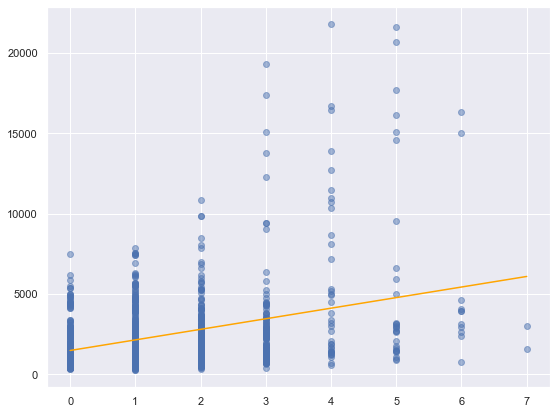

In [17]:
fig, ax = plt.subplots(figsize=(9, 7))

SWISU_x = df[['Ac_Count']]
SWISU_y = df['Price']
ax.scatter(SWISU_x, SWISU_y, alpha=.5)

_x = np.linspace(SWISU_x.min(), SWISU_x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange')

#### Result:

R^2 is very low, I'll try to do prediction for numerical and categorical features

## Regressions for numerical and categorical features

Creating copy of df and mapping some categorical features

In [18]:
df_dummies = df.copy()

For this category, let's map an "other" category before adding the feature to our feature set and running a new benchmark.

In [19]:
#brands to others
brnd_counts = df_dummies.Brand.value_counts()
other_brands = list(brnd_counts[brnd_counts <= 8].index)
df_dummies['Brand'] = df_dummies['Brand'].replace(other_brands, 'Other')

In [20]:
#Exterior Color to others
ec_counts = df_dummies.Exterior_Color.value_counts()
other_ec = list(ec_counts[ec_counts < 10].index)
df_dummies['Exterior_Color'] = df_dummies['Exterior_Color'].replace(other_ec, 'Other')

In [21]:
#Exterior Material to others
em_counts = df_dummies.Exterior_Material.value_counts()

other_em = list(em_counts[em_counts < 10].index)

df_dummies['Exterior_Material'] = df_dummies['Exterior_Material'].replace('Canvas (Coated)', 'Canvas Coated')
df_dummies['Exterior_Material'] = df_dummies['Exterior_Material'].replace('Canvas (Plain)', 'Canvas Plain')
df_dummies['Exterior_Material'] = df_dummies['Exterior_Material'].replace(other_em, 'Other')

In [22]:
#Interior Color to others
ic_counts = df_dummies.Interior_Color.value_counts()
other_ic = list(ic_counts[ic_counts < 10].index)
df_dummies['Interior_Color'] = df_dummies['Interior_Color'].replace(other_ic, 'Other')

In [23]:
#Interior Material to others
im_counts = df_dummies.Interior_Material.value_counts()
other_im = list(im_counts[im_counts < 10].index)
df_dummies['Interior_Material'] = df_dummies['Interior_Material'].replace(other_im, 'Other')

In [24]:
df_dummies = df_dummies[df_dummies.Price < 8000] #remove outliers

#### Boxplots for every cateforical features and target(price)

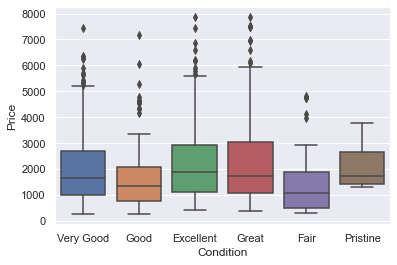

In [25]:
ax = sns.boxplot(x="Condition", y="Price", data=df_dummies)

[Text(0, 0, 'Chanel'),
 Text(1, 0, 'Louis Vuitton'),
 Text(2, 0, 'Fendi'),
 Text(3, 0, 'Christian Dior'),
 Text(4, 0, 'Hermes'),
 Text(5, 0, 'Prada'),
 Text(6, 0, 'Saint Laurent'),
 Text(7, 0, 'Gucci'),
 Text(8, 0, 'Chloe'),
 Text(9, 0, 'Celine'),
 Text(10, 0, 'Bottega Veneta'),
 Text(11, 0, 'Other'),
 Text(12, 0, 'Balenciaga')]

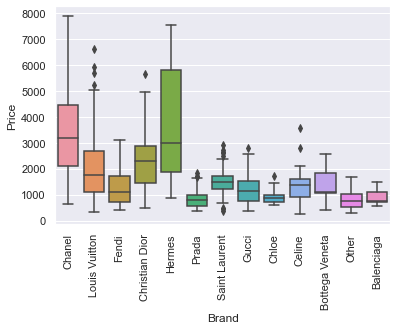

In [26]:
ax = sns.boxplot(x="Brand", y="Price", data=df_dummies)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'Neutral'),
 Text(1, 0, 'Brown'),
 Text(2, 0, 'Pink'),
 Text(3, 0, 'Blue'),
 Text(4, 0, 'Yellow'),
 Text(5, 0, 'Other'),
 Text(6, 0, 'Red'),
 Text(7, 0, 'Black'),
 Text(8, 0, 'White'),
 Text(9, 0, 'Green'),
 Text(10, 0, 'Gray'),
 Text(11, 0, 'Purple'),
 Text(12, 0, 'Orange')]

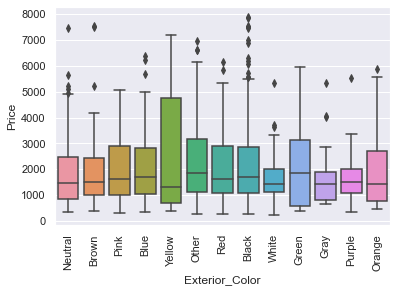

In [27]:
ax = sns.boxplot(x="Exterior_Color", y="Price", data=df_dummies)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'Leather'),
 Text(1, 0, 'Canvas Coated'),
 Text(2, 0, 'Other'),
 Text(3, 0, 'Canvas Plain'),
 Text(4, 0, 'Patent Leather'),
 Text(5, 0, 'Nylon'),
 Text(6, 0, 'Grainy Leather'),
 Text(7, 0, 'Suede'),
 Text(8, 0, 'Velvet'),
 Text(9, 0, 'Denim')]

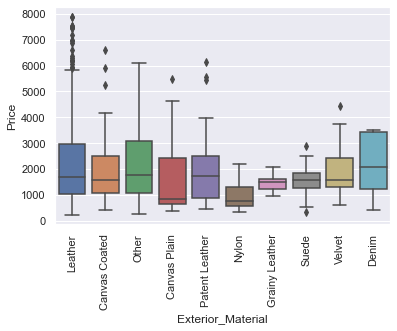

In [28]:
ax = sns.boxplot(x="Exterior_Material", y="Price", data=df_dummies)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

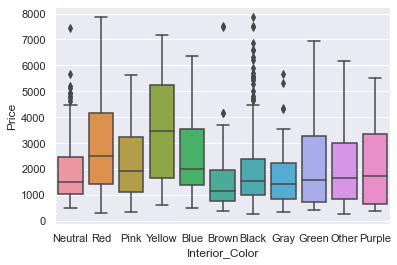

In [29]:
ax = sns.boxplot(x="Interior_Color", y="Price", data=df_dummies)

[Text(0, 0, 'Fabric'),
 Text(1, 0, 'Leather'),
 Text(2, 0, 'Microfiber'),
 Text(3, 0, 'Other'),
 Text(4, 0, 'Suede'),
 Text(5, 0, 'Fabric, Leather'),
 Text(6, 0, 'Satin'),
 Text(7, 0, 'Nylon'),
 Text(8, 0, 'Canvas Plain'),
 Text(9, 0, 'Raw Leather')]

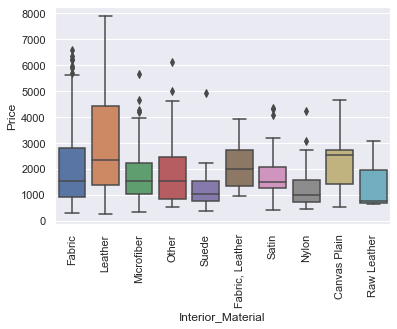

In [30]:
ax = sns.boxplot(x="Interior_Material", y="Price", data=df_dummies)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

## Cross Validations and regressions

In [31]:
X, y = pd.get_dummies(df_dummies.drop('Price',axis=1)), df_dummies['Price']

# hold out 20% of the data for final testing
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=10)

### 1 Validation 

In [32]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [33]:
split_and_validate(X_, y_)


Validation R^2 score was: 0.4551968648246444
Feature coefficient results: 

Volume : 0.38
Ac_Count : 86.86
Brand_Balenciaga : -890.03
Brand_Bottega Veneta : -532.63
Brand_Celine : -584.87
Brand_Chanel : 1740.55
Brand_Chloe : -710.18
Brand_Christian Dior : 662.94
Brand_Fendi : -264.32
Brand_Gucci : -289.11
Brand_Hermes : 2073.47
Brand_Louis Vuitton : 336.58
Brand_Other : -771.75
Brand_Prada : -624.43
Brand_Saint Laurent : -146.23
Condition_Excellent : 455.79
Condition_Fair : -290.34
Condition_Good : -448.88
Condition_Great : 315.64
Condition_Pristine : -62.33
Condition_Very Good : 30.13
Exterior_Color_Black : -127.82
Exterior_Color_Blue : 124.85
Exterior_Color_Brown : -38.78
Exterior_Color_Gray : 118.83
Exterior_Color_Green : -65.06
Exterior_Color_Neutral : 187.15
Exterior_Color_Orange : -51.58
Exterior_Color_Other : 109.02
Exterior_Color_Pink : -145.18
Exterior_Color_Purple : 210.53
Exterior_Color_Red : -418.91
Exterior_Color_White : -175.83
Exterior_Color_Yellow : 272.79
Exterior_Mat

### Cross Validation on Linear Regression

In [34]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

r2_5 = cross_val_score(lm, X_, y_, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

In [35]:
print(r2_5)
print(r2_5.mean())

[0.45274819 0.47667696 0.4696716  0.44797821 0.41662466]
0.45273992331345037


### Polynomial regression:

In [36]:
X, y = pd.get_dummies(df_dummies.drop('Price',axis=1)), df_dummies['Price']

# hold out 20% of the data for final testing
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=10)

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_poly_r2s = []

for train_ind, val_ind in kf.split(X,y):    
    #poly with degree 2
    poly = PolynomialFeatures(degree=2, interaction_only=True)
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 

    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    lm_poly = LinearRegression()
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_r2s.append(round(lm_poly.score(X_val_poly, y_val), 3))
    
print('Poly scores: ', cv_lm_poly_r2s, '\n')

print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')

Poly scores:  [-19.678, -14.761, -41.516, -1210265931564651.8, -108.731] 

Poly mean cv r^2: -242053186312967.312 +- 484106372625842.250


#### There's so different R^2 on each validation set it's mean model has high varince overfit

### There were overfitting model. Too complex model(too many features), high variance

Should be used regularization for overfit model!

I use Lasso regularization (it's a lot of features after OneHotEncoding, so Lasso will help to get rid of not meaningful features)

In [38]:
X, y = pd.get_dummies(df_dummies.drop('Price',axis=1)), df_dummies['Price']

In [39]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [40]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [41]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [42]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [43]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

20.72921779595372

In [44]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('Volume', 74.66120344363127),
 ('Ac_Count', 141.89372329581522),
 ('Brand_Balenciaga', -76.52916720648541),
 ('Brand_Bottega Veneta', -0.0),
 ('Brand_Celine', -0.0),
 ('Brand_Chanel', 840.9769772804028),
 ('Brand_Chloe', -54.81122514803041),
 ('Brand_Christian Dior', 191.4017316919235),
 ('Brand_Fendi', -0.0),
 ('Brand_Gucci', -20.436387181853945),
 ('Brand_Hermes', 268.30379496113187),
 ('Brand_Louis Vuitton', 195.81393171130264),
 ('Brand_Other', -65.68363981114125),
 ('Brand_Prada', -107.94573810091943),
 ('Brand_Saint Laurent', 0.0),
 ('Condition_Excellent', 205.26655515589496),
 ('Condition_Fair', -63.455393391931146),
 ('Condition_Good', -100.82290963912652),
 ('Condition_Great', 127.497381745506),
 ('Condition_Pristine', -21.728762146119408),
 ('Condition_Very Good', -0.0),
 ('Exterior_Color_Black', 0.0),
 ('Exterior_Color_Blue', -0.0),
 ('Exterior_Color_Brown', -21.23681922548849),
 ('Exterior_Color_Gray', 19.27356970027922),
 ('Exterior_Color_Green', -0.0),
 ('Exterior_Color

In [45]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [46]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

777.7941008018068

In [47]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

777.7941008018068

In [48]:
r2_score(y_test, test_set_pred)

0.48182797826078005

Plotting:

In [49]:
## Scale the variables
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [50]:
X_tr = std.transform(X_train.values)

In [51]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

Computing regularization path using the LARS ...


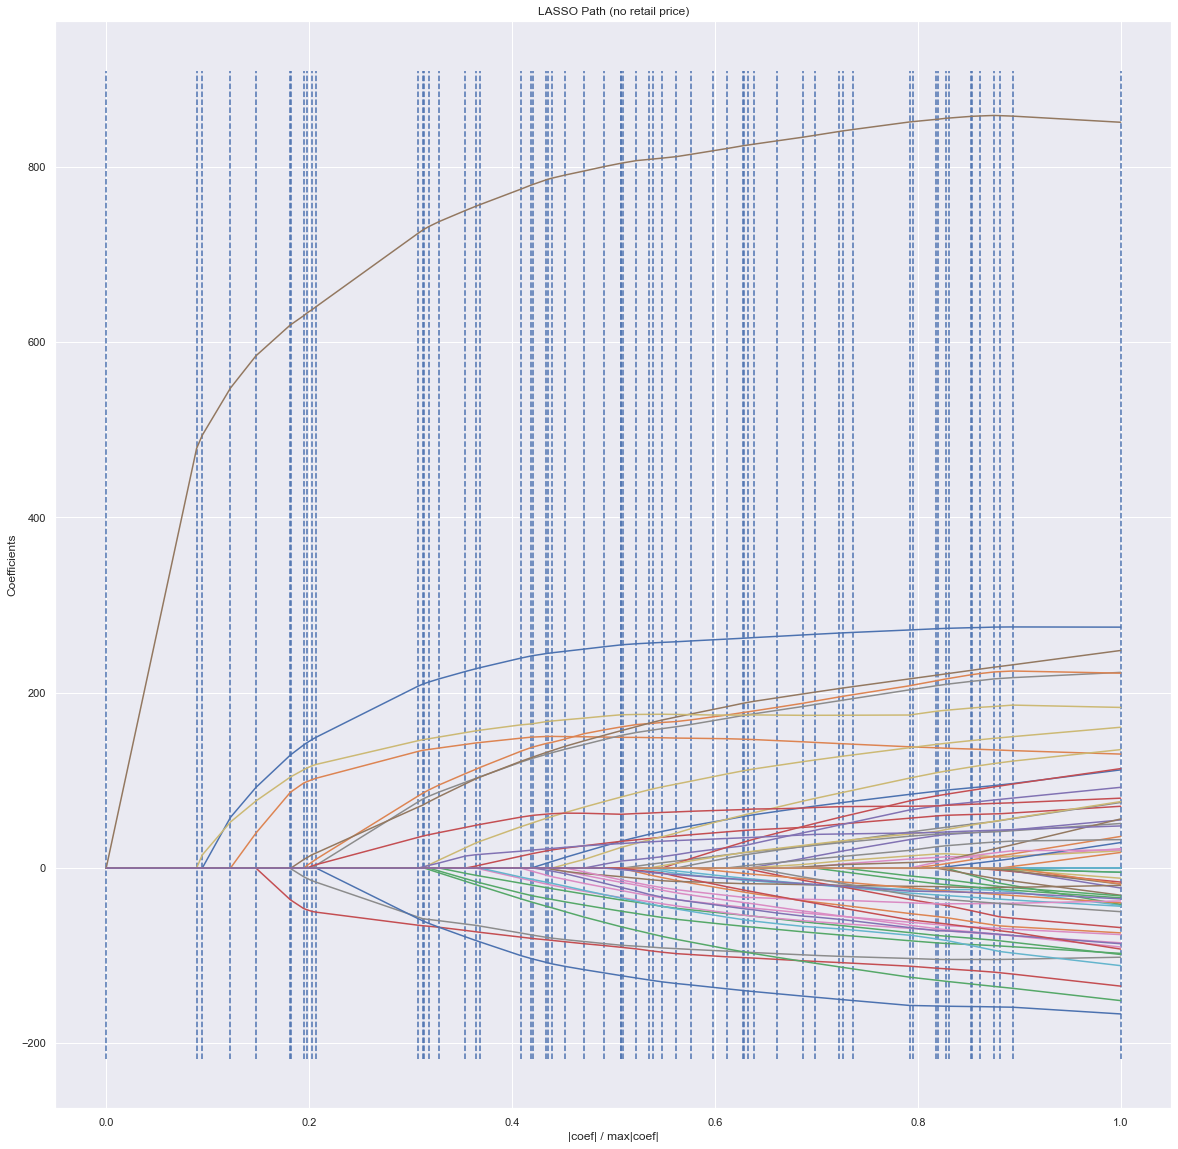

In [52]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(20,20))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path (no retail price)')
plt.axis('tight')
#plt.legend(X_train.columns)
plt.show()

Because R^2 was low(0.48) I decided to add retail price too for analysis, to make better prediction model

### Creating DF Adding retail price feature

In [53]:
df_retail= df_all.loc[:,['Brand', 'Price', 'Condition', 'Retail_Price', 'Volume',
       'Exterior_Color', 'Exterior_Material', 'Interior_Color',
       'Interior_Material', 'Ac_Count']]

In [54]:
df_retail = df_retail.dropna()

In [55]:
#brands to others
brnd_counts = df_retail.Brand.value_counts()
other_brands = list(brnd_counts[brnd_counts <= 8].index)
df_retail['Brand'] = df_retail['Brand'].replace(other_brands, 'Other')

#Exterior Color to others
ec_counts = df_retail.Exterior_Color.value_counts()
other_ec = list(ec_counts[ec_counts < 10].index)
df_retail['Exterior_Color'] = df_retail['Exterior_Color'].replace(other_ec, 'Other')


#Exterior Material to others
em_counts = df_retail.Exterior_Material.value_counts()
other_em = list(em_counts[em_counts < 10].index)
df_retail['Exterior_Material'] = df_retail['Exterior_Material'].replace('Canvas (Coated)', 'Canvas Coated')
df_retail['Exterior_Material'] = df_retail['Exterior_Material'].replace('Canvas (Plain)', 'Canvas Plain')
df_retail['Exterior_Material'] = df_retail['Exterior_Material'].replace(other_em, 'Other')

#Interior Color to others
ic_counts = df_retail.Interior_Color.value_counts()
other_ic = list(ic_counts[ic_counts < 10].index)
df_retail['Interior_Color'] = df_retail['Interior_Color'].replace(other_ic, 'Other')

#Interior Material to others
im_counts = df_retail.Interior_Material.value_counts()
other_im = list(im_counts[im_counts < 10].index)
df_retail['Interior_Material'] = df_retail['Interior_Material'].replace(other_im, 'Other')

Correlation for price and numerical fetures after adding retail price

In [56]:
df_retail.corr()

,Price,Retail_Price,Volume,Ac_Count
Price,1.000000,0.898747,-0.084019,0.019283
Retail_Price,0.898747,1.000000,0.024813,-0.011466
Volume,-0.084019,0.024813,1.000000,0.064233
Ac_Count,0.019283,-0.011466,0.064233,1.000000


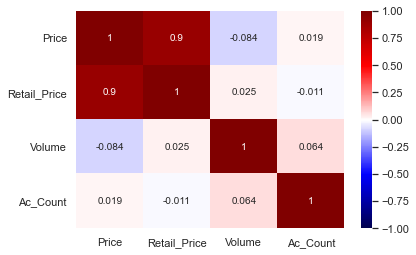

In [57]:
sns.heatmap(df_retail.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

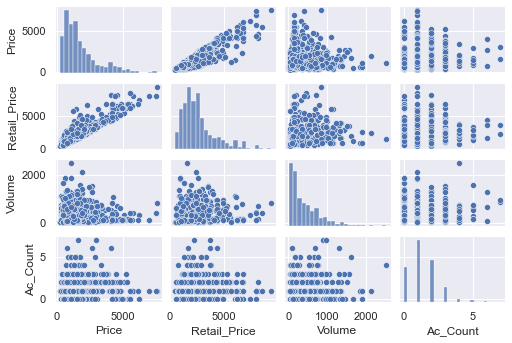

In [58]:
sns.pairplot(df_retail, height=1.2, aspect=1.5);

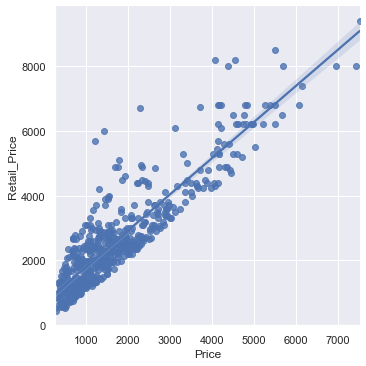

In [59]:
sns.lmplot(x="Price", y="Retail_Price", data = df_retail)

### Lasso regularization after adding retail price

In [60]:
X, y = pd.get_dummies(df_retail.drop('Price',axis=1)), df_retail['Price']

In [61]:
#Split the data 60 - 20 - 20 train/val/test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [62]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [63]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [64]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [65]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

12.458833642950081

In [66]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('Retail_Price', 1116.2147588809758),
 ('Volume', -109.16339632591352),
 ('Ac_Count', 28.578232072494238),
 ('Brand_Balenciaga', -17.019511353786754),
 ('Brand_Bottega Veneta', 0.0),
 ('Brand_Celine', -7.005561511935131),
 ('Brand_Chanel', 161.124646639958),
 ('Brand_Chloe', -10.580916259201476),
 ('Brand_Christian Dior', -51.60985998030572),
 ('Brand_Fendi', -45.933071338938326),
 ('Brand_Gucci', 0.0),
 ('Brand_Louis Vuitton', 70.04436048035778),
 ('Brand_Other', -0.0),
 ('Brand_Prada', -56.56189661623816),
 ('Brand_Saint Laurent', 30.81805029519051),
 ('Condition_Excellent', 63.14137386515672),
 ('Condition_Fair', -39.310090028132514),
 ('Condition_Good', -18.116354679129103),
 ('Condition_Great', 37.251997921998985),
 ('Condition_Pristine', 40.203543171174026),
 ('Condition_Very Good', -0.0),
 ('Exterior_Color_Black', -0.0),
 ('Exterior_Color_Blue', 0.0),
 ('Exterior_Color_Brown', 0.0),
 ('Exterior_Color_Gray', -0.0),
 ('Exterior_Color_Green', -50.82358778366621),
 ('Exterior_Color

In [67]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [68]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

393.919048448657

In [69]:
r2_score(y_test, test_set_pred)

0.7801052205768848

After adding retil value I got R^2 = 0.78

Much better!

MAE = 393 which means prediction could be off(plus or minus) $393 for each bag

Plot

In [70]:
## Scale the variables
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [71]:
X_tr = std.transform(X_train.values)

In [72]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

Computing regularization path using the LARS ...


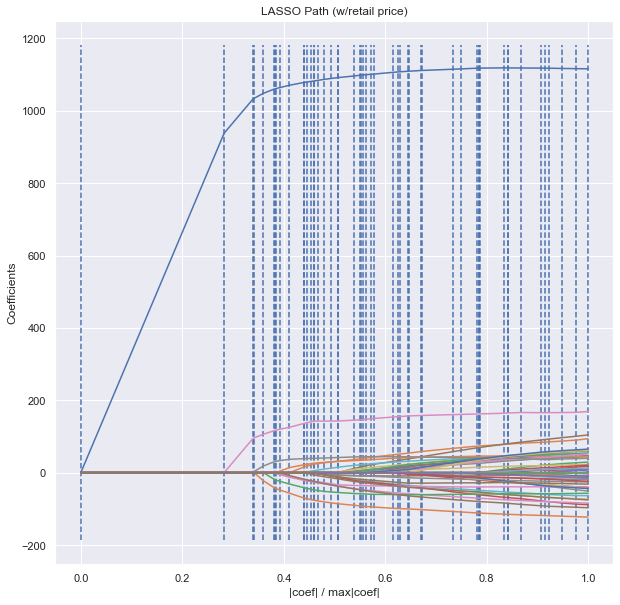

In [73]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path (w/retail price)')
plt.axis('tight')
#plt.legend(X_train.columns)
plt.show()

#### Prediction graphic:

Text(0, 0.5, 'Actual')

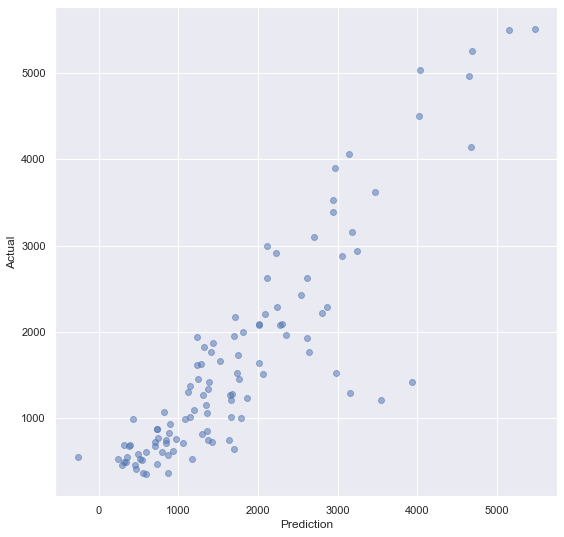

In [74]:
fig, ax = plt.subplots(figsize=(9, 9))

#SWISU_x = y_train_val
#SWISU_y = y_test

ax.scatter(test_set_pred, y_test, alpha=.5)
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
#ax.set_title('Predictable price & Actual')

## Result:

I got the prediction model which has R^2 = 0.78

MAE = 393 which means prediction off on $393 of actual price

I was using LASSO reguraliztion to get the most meaningful features and don't overfit model